In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.76
Loading CCF brain structure data...
Loading time: 0.00


Input .swc data file, total **1602**.

ns = nmt.neuron_set('/home/penglab/FeaCal/allData')
pickle.dump([ns], open("/home/penglab/FeaCal/allDatans.pickle", "wb"))

In [2]:
import pickle
pickle_in = open("/home/penglab/FeaCal/allDatans.pickle","rb")
example_ = pickle.load(pickle_in)
ns= example_[0]

# 2.1) Distribution of soma location
* Set the *thre* value to determine the threshold for showing the region distribution

## Previous Version: Using Bar plot to show the distribution

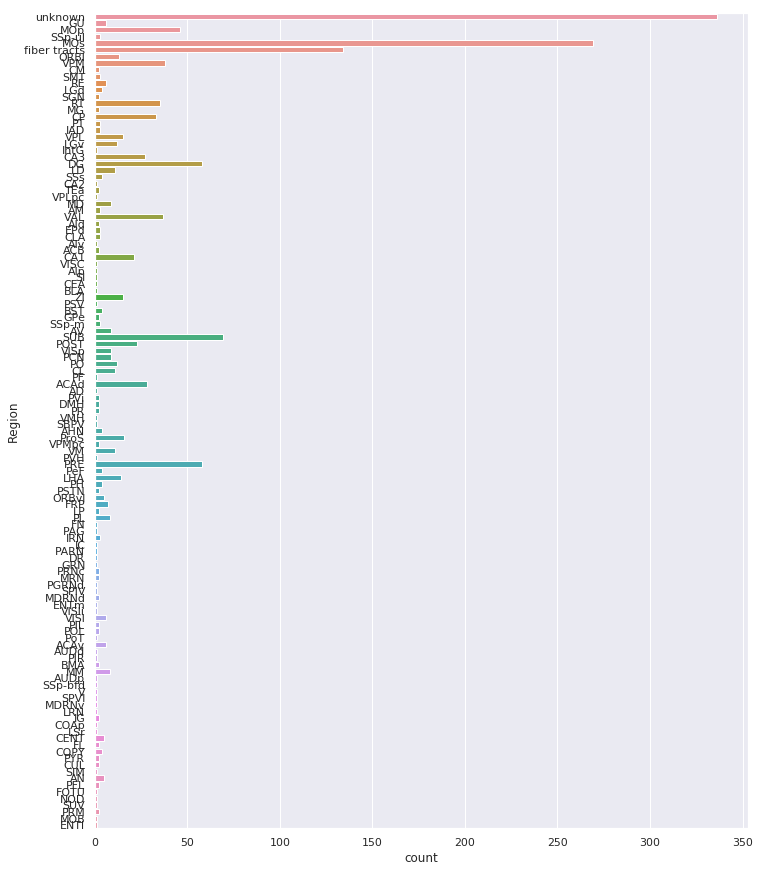

In [3]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(11.7,15)})
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>thre])],
                 )


## 2.1.1) Based on 7 regions
* including Isocortex, OLF, HPF, CTXsp, CNU, BS, CB; 

In [4]:

mouseDF = pd.read_excel('/home/penglab/FeaCal/dataSource/mouseDF.xlsx',index=0)
abbrlist = []
for i in mouseDF.loc[:,'idx']:
    if i in nmt.bs.level.index:
        abbr = nmt.bs.level.loc[i,'Abbrevation']
        abbrlist.append(abbr)
    else:
        print(i)
        abbrlist.append('unknown')
mouseDF.loc[:,'ABBR']=abbrlist
del mouseDF[1]
mouseDF.set_index(['idx'],inplace=True)

somaRegDF = ns.features['soma_features'].region.copy()
large_list = [ 'BS', 'CB','CNU', 'CTXsp', 'HPF','Isocortex', 'OLF']
mouseDF['FatherRe'] = mouseDF.loc[:,'ABBR']
        
for B_iter in large_list :
    temp=[]
    if nmt.bs.name_to_id(B_iter) in mouseDF.index:
        for child_iter in mouseDF.loc[nmt.bs.name_to_id(B_iter),'Child ID'].split():
            if int(child_iter) in mouseDF.index:
                mouseDF.loc[int(child_iter),'FatherRe'] = B_iter
            else:
                print(child_iter)
            #temp.append(nmt.bs.level.loc[int(child_iter),'Abbrevation'])
somaRegDF['main7Region'] = somaRegDF['Region']     
for iterR in somaRegDF.index:
    if somaRegDF.loc[iterR,'Region'] in mouseDF['ABBR'].tolist():
        somaRegDF.loc[iterR,'main7Region'] = mouseDF[mouseDF['ABBR']==somaRegDF.loc[iterR,'Region']].iloc[0,-1]

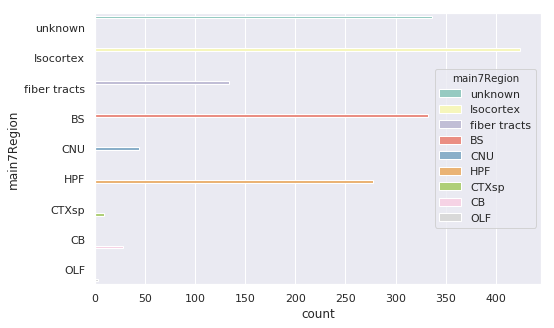

In [5]:
ct = somaRegDF["main7Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(8,5)})
_ = sns.countplot(y="main7Region", 
                  data=somaRegDF.loc[somaRegDF.main7Region.isin(ct.index[ct>thre])],
                  hue = "main7Region", palette="Set3"
                 )


## 2.1.2) Projecting to three directions: "Horizontal","Coronal","Sagittal"

### By setting color="majorSOMA" in cell_in_map, the soma point will be shown with 7 major regions
* Here set the 'Cluster' column in ns.metadata to be the region name.

### By setting color="soma" in cell_in_map, the soma point will be shown with 256 colors
* No need to set the 'Cluster' column in ns.metadata to be the region name.

**func cell_in_map(neurons_dict, cell_list, metadata, ccf_annotation,view,margin, dpi, enlarge,alpha, ax,color,flip_soma)**
* neurons_dict: dictionary *ns.neurons*
* cell_list: index of corresponding neurons's .swc
* metadata: DataFrame *ns.metadata*
* ccf_annotation: nmt.image object
* view: "Horizontal","Coronal","Sagittal"
* margin:
* dpi
* enlarge
* alpha=0.5
* ax=None
* color: 'SingleCell', 'CellType', 'Subtype', 'cluster', 'nblast'
* flip_soma=True

In [6]:
ns.metadata['Cluster'] = somaRegDF["main7Region"]

In [12]:
from neuro_morpho_toolbox.plot import get_group_colors
get_group_colors(metadata=ns.metadata, group_by="Cluster", palette="paired", return_str=False)

{'BS': [0.6509803921568628, 0.8117647058823529, 0.8901960784313725],
 'CB': [0.1411764705882353, 0.6509803921568628, 0.7529411764705882],
 'CNU': [0.5725490196078431, 0.8392156862745098, 0.4117647058823529],
 'CTXsp': [0.7294117647058823, 0.8627450980392157, 0.23137254901960785],
 'HPF': [0.9490196078431372, 0.3333333333333333, 0.33725490196078434],
 'Isocortex': [0.9647058823529412, 0.5176470588235295, 0.2901960784313726],
 'OLF': [0.996078431372549, 0.5529411764705883, 0.10980392156862745],
 'fiber tracts': [0.8117647058823529, 0.6235294117647059, 0.8313725490196079],
 'unknown': [0.41568627450980394, 0.23921568627450981, 0.6]}

In [13]:
 cl.to_html([0.41568627450980394, 0.23921568627450981, 0.6] )

Exception: Could not determine type of input colorscale.
Colorscales must be in one of these 3 forms:
[ (255, 255, 255), (255, 255, 255), (255, 255, 255) ]
[ "rgb(255, 255, 255)", "rgb(255, 255, 255)", "rgb(255, 255, 255)" ]
[ "hsl(360,100,100)", "hsl(360,100,100)", "hsl(360,100,100)" ]

Illustrating soma locations inside a brain from sagittal view:


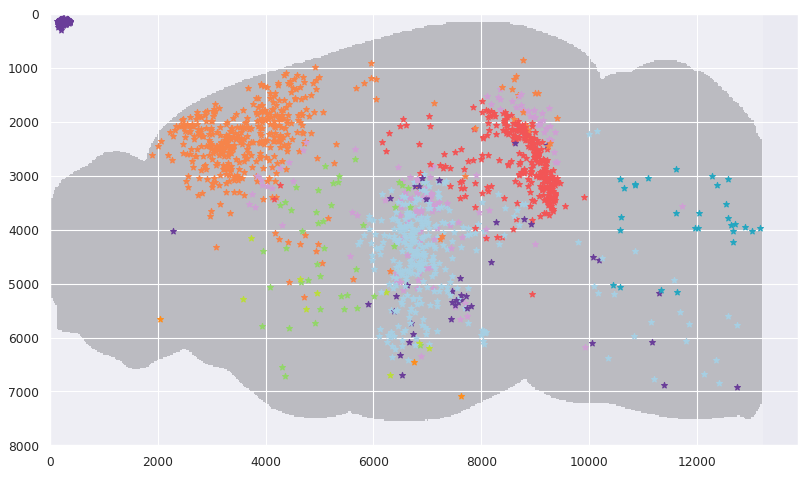

In [7]:
from neuro_morpho_toolbox.plot import cell_in_map

test_list = ns.metadata.index.tolist()
cell_in_map(ns.neurons, test_list[:], ns.metadata, ccf_annotation=nmt.annotation, view="Sagittal", color="majorSOMA")

Illustrating soma locations inside a brain from coronal view:


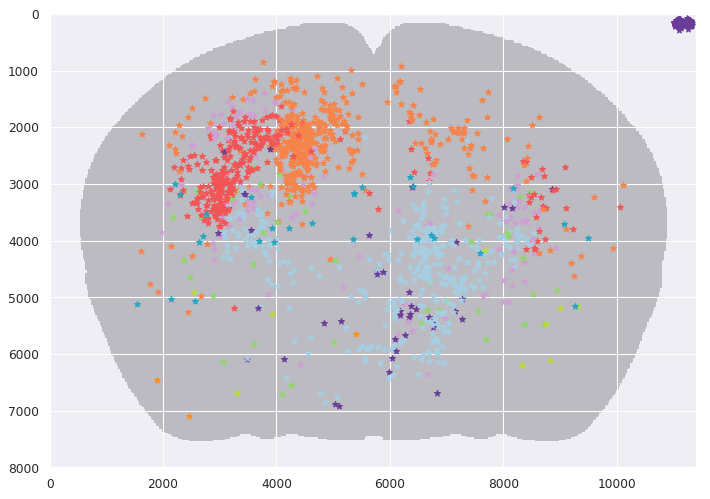

In [8]:
from neuro_morpho_toolbox.plot import cell_in_map

test_list = ns.metadata.index.tolist()
cell_in_map(ns.neurons, test_list[:], ns.metadata, ccf_annotation=nmt.annotation, view="Coronal", color="majorSOMA")

Illustrating soma locations inside a brain from horizontal view:


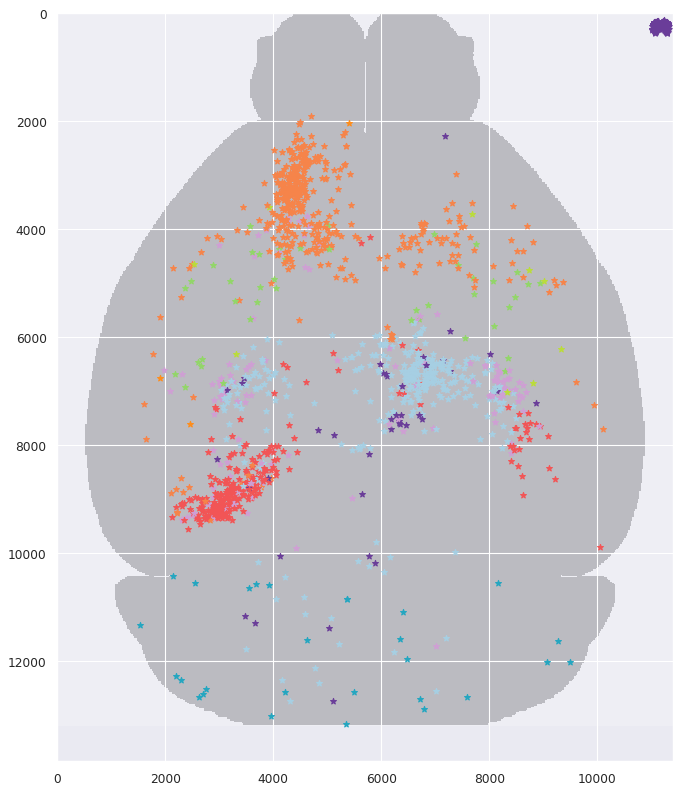

In [9]:
from neuro_morpho_toolbox.plot import cell_in_map

test_list = ns.metadata.index.tolist()
cell_in_map(ns.neurons, test_list[:], ns.metadata, ccf_annotation=nmt.annotation, view="Horizontal", color="majorSOMA")

In [10]:
xxxx

NameError: name 'xxxx' is not defined

In [ ]:
import os
import shutil
file_list=[]
for i in os.listdir('/home/penglab/Desktop/jbasum'):
    (filename,extension) = os.path.splitext(i)
    file_list.append(filename)

for fileiter in iterlist:
    pathtemp = '/home/penglab/Desktop/jbasumOCT'
    folder = os.path.exists(pathtemp)
    if not folder:         
        os.makedirs(pathtemp)       
    for swcname in detailDF.loc['C'+str(numiter),'swc list']:
        oldname = '/home/penglab/Documents/Janelia_1000/'+str(swcname)+'.swc'
        newname = str(pathtemp)+'/'+str(swcname)+'.swc'
        shutil.copyfile(oldname,newname)    
    
    
    
    

In [ ]:
import os
import shutil
file_list=[]
for i in os.listdir('/home/penglab/Desktop/jbasum'):
    (filename,extension) = os.path.splitext(i)
    file_list.append(filename)

for fileiter in file_list:
    pathdes = '/home/penglab/Desktop/jbasumOCT'
    folder = os.path.exists(pathdes)
    if not folder:         
        os.makedirs(pathdes)       
    pathtemp = '/home/penglab/Desktop/jbasum/'+str(fileiter)
    swc_list=[]
    for i_swc in os.listdir(pathtemp ):
        oldname = pathtemp + '/'+ str(i_swc)
        newname = pathdes + '/'+ str(i_swc)
        shutil.copyfile(oldname,newname)
    print('Finished folder '+ str(fileiter))

In [ ]:
ww_list=[]
for i in os.listdir('/home/penglab/Desktop/jbasumOCT'):
    (filename,extension) = os.path.splitext(i)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    ww_list.append(filename)
print('Number of swc files from Wanwan: '+ str(len(ww_list)))


In [ ]:
# Move wanwan's to wwRename
for i_swc in os.listdir('/home/penglab/Desktop/jbasumOCT' ):
    folder = os.path.exists('/home/penglab/Desktop/wwRename')
    if not folder:         
        os.makedirs('/home/penglab/Desktop/wwRename')       
    oldname = '/home/penglab/Desktop/jbasumOCT' + '/'+ str(i_swc)
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    newname = '/home/penglab/Desktop/wwRename' + '/'+ str(filename)+'.swc'
    shutil.copyfile(oldname,newname)

In [ ]:
# Move Xie's to sumTOGETHER
for i_swc in os.listdir('/home/penglab/Desktop/registered_swc' ):
    folder = os.path.exists('/home/penglab/Desktop/sumTOGETHER')
    if not folder:         
        os.makedirs('/home/penglab/Desktop/sumTOGETHER')       
    oldname = '/home/penglab/Desktop/registered_swc' + '/'+ str(i_swc)
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    newname = '/home/penglab/Desktop/sumTOGETHER' + '/'+ str(filename)+'.swc'
    shutil.copyfile(oldname,newname)

In [ ]:
# Move inWnotX to sumTOGETHER
for i_swc in os.listdir('/home/penglab/Desktop/wwRename' ):
    folder = os.path.exists('/home/penglab/Desktop/sumTOGETHER')
    if not folder:         
        os.makedirs('/home/penglab/Desktop/sumTOGETHER')       
    oldname = '/home/penglab/Desktop/wwRename' + '/'+ str(i_swc)
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    newname = '/home/penglab/Desktop/sumTOGETHER' + '/'+ str(filename)+'.swc'
    shutil.copyfile(oldname,newname)

In [ ]:
xie_list=[]
for i in os.listdir('/home/penglab/Desktop/registered_swc'):
    (filename,extension) = os.path.splitext(i)
    xie_list.append(filename)
len(xie_list)


In [ ]:
inWnotX = []
for i in ww_list:
    if i not in xie_list:
        inWnotX.append(i)
inXnotW = []
for i in xie_list:
    if i not in ww_list:
        inXnotW.append(i)

In [ ]:
len(inXnotW)

In [ ]:
517+83

In [ ]:
294-83+306

In [ ]:
83+211+306

In [ ]:
import shutil
import os
iterlist = [14,17,19,21,23]
for numiter in iterlist:
    
    pathtemp = '/home/penglab/Documents/Janelia_test/cluster'+str(numiter)
    folder = os.path.exists(pathtemp)
    if not folder:         
        os.makedirs(pathtemp)       
    for swcname in detailDF.loc['C'+str(numiter),'swc list']:
        oldname = '/home/penglab/Documents/Janelia_1000/'+str(swcname)+'.swc'
        newname = str(pathtemp)+'/'+str(swcname)+'.swc'
        shutil.copyfile(oldname,newname)

## Feature 1: projection patterns

## metadata

In [ ]:
# df = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_08082019.xlsx", index_col=[0])
# metadata = ns.features['soma_features'].region
# df = df.loc[metadata.index]
# df.to_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_08082019.284_cells.xlsx")

In [ ]:
df = pd.read_excel("../Subjective_celltype/tracking_table.284_cells.xlsx", index_col=[0])
region_list = pd.read_excel("../Subjective_celltype/tracking_table.284_cells.xlsx", sheet_name=1, header=None)[2].tolist()

metadata = ns.features['soma_features'].region.copy()
metadata['Celltype'] = df.loc[metadata.index, "Confirmed"]
# # metadata['Celltype_note'] = df.loc[metadata.index, "Lijuan Note"]
# # metadata.loc[metadata["Celltype_note"]=="CPU", "Celltype"] = "CPU"
metadata.fillna("Others", inplace=True)
metadata.loc[metadata.Celltype.isin(["TH", "VPM/VPL"]), "Celltype"] = "TH_Uncertain"
metadata.loc[~metadata.Celltype.isin(["Others", "TH_Uncertain"]+region_list), "Celltype"] = "Others"
print(metadata.Celltype.value_counts())
# metadata
pickle.dump([metadata], open("metadata.pickle", "wb"))

## Color setting

In [ ]:
bupu = cl.scales['9']['seq']['BuPu']
greens = cl.scales['9']['seq']['Greens']
set2 = cl.scales['7']['qual']['Set2']
spectral = cl.scales['9']['div']['Spectral']
paired = cl.scales['10']['qual']['Paired']
mpl_colors = []
for i in range(9):
    tp = []
    for j in list(matplotlib.colors.to_rgb("C"+str(i))):
        tp.append(str(int(j*255)))
    tp = ", ".join(tp)
    tp = "rgb(" + tp + ")"
    mpl_colors.append(tp)
   
def rgb_to_list(rgb_str):
    tp = rgb_str.replace("rgb(", "").replace("rgba(", "").replace(")", "")
    res = [float(i)/255 for i in tp.split(", ")]
    return res

def get_celltype_colors(metadata):
    u_celltypes = sorted(list(set(metadata.Celltype)))
    color_list = cl.to_rgb(cl.interp(paired, len(u_celltypes)))
    color_list = [rgb_to_list(i) for i in color_list]
    celltype_colors = dict(zip(u_celltypes, color_list))
    if "Others" in u_celltypes:
        celltype_colors["Others"] = rgb_to_list('rgb(128, 128, 128)')
    return celltype_colors

celltype_color_dict = get_celltype_colors(metadata)

pickle.dump([celltype_color_dict], open("colors.pickle", "wb"))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,8))
for i, key in enumerate(list(celltype_color_dict.keys())):
    ax.scatter(0.001, len(celltype_color_dict) - i, c=celltype_color_dict[key], s=100)
    ax.text(0.002, len(celltype_color_dict) - i, key, 
            horizontalalignment='left',
            verticalalignment="center",
            fontdict={"size":16}
           )
    ax.set_xlim(0, 0.01)
    ax.axis("off")

In [ ]:
ns.metadata["CellType"] = metadata.loc[ns.metadata.index, "Celltype"]
clusters = pd.read_csv("clusters.csv", index_col=[0])
ns.metadata['Cluster'] = clusters.loc[ns.metadata.index, "Cluster"]
ns.metadata["CellType_note"] = metadata.loc[ns.metadata.index, "Celltype_note"]

In [ ]:
pickle.dump([ns], open("neuron_set.pickle", "wb"))

In [ ]:
ns.features['projection_features'].normalize(log=True)
pickle.dump([ns.features['projection_features']], open("features_projection.pickle", "wb"))

In [ ]:
ns.features['projection_features'].scaled_data

## Feature 2: soma locations

In [ ]:
pickle.dump([ns.features['soma_features']], open("features_soma.pickle", "wb"))

## Feature 3: axon morphological features

In [ ]:
# 1. Axon overall
df1 = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df1.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df1 = df1[use_cols]

feature_name = use_cols
new_feature_name = ['A_'+i.replace(' ', '_') for i in use_cols]
df1.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)


In [ ]:
# 2. Local axon
df2 = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df2.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df2 = df2[use_cols]

feature_name = use_cols
new_feature_name = ['AL_'+i.replace(' ', '_') for i in use_cols]
df2.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)

In [ ]:
df = pd.concat([df1, df2], axis=1)
lm_axon = nmt.features("L-measure of axon")
lm_axon.add_raw_data(df)

pickle.dump([lm_axon], open("features_lm_axon.pickle", "wb"))

## Feature 4: dendrite morphological features

In [ ]:
df = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df = df[use_cols]

feature_name = use_cols
new_feature_name = ['D_'+i.replace(' ', '_') for i in use_cols]
df.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)

lm_dendrite = nmt.features("L-measure of dendrite")
lm_dendrite.add_raw_data(df)

pickle.dump([lm_dendrite], open("features_lm_dendrite.pickle", "wb"))

In [ ]:
print(np.log(10000), np.log(5000))